# Лабораторна робоат № 4. ІП-14 Бабіч Денис

## Підготовчий етап

### Імпортування необхідних модулів

In [74]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import graphviz
from sklearn import tree
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import FitFailedWarning

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

### Створення допоміжних функцій

In [75]:
warnings.filterwarnings("ignore", category = FitFailedWarning)

def rename_column(dataframe: pd.DataFrame, old_column_name: str, new_column_name: str) -> None:
    dataframe = dataframe.rename(columns = {old_column_name: new_column_name}, inplace = True)


def convert_column(dataframe: pd.DataFrame, column_name: str, data_type: type):
    def convert_value(value):
        if data_type == int:
            if isinstance(value, int):
                return value
            try:
                int_value = int(value)
                if int_value == float(value):
                    return int_value
                return np.nan
            except (ValueError, TypeError):
                return np.nan
        elif data_type == float:
            if isinstance(value, float):
                return value
            try:
                return float(value)
            except (ValueError, TypeError):
                return np.nan

    dataframe[column_name] = dataframe[column_name].apply(convert_value)


def convert_value(value, data_type):
    try:
        if data_type == int:
            return int(value)
        elif data_type == float:
            return float(value)
    except (ValueError, TypeError):
        return np.nan


def convert_column(dataframe: pd.DataFrame, column_name: str, data_type: type):
    dataframe[column_name] = dataframe[column_name].apply(convert_value, args = (data_type,))
    dataframe[column_name] = dataframe[column_name].fillna(0).astype(data_type)


def build_confusion_matrix(model: any, x_test: list, y_test: list) -> None:
    plt.figure(figsize = (8, 5))
    sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot = True, fmt = ".1f", cmap = "coolwarm")
    plt.show()


def build_tree_visualization(model: any, feature_names: list, class_names: list):
    dot_data = tree.export_graphviz(model, out_file=  None,
                                    feature_names = feature_names,
                                    class_names = class_names)
    
    display(graphviz.Source(dot_data))

### Заповнення датафрейму

In [76]:
# loc             : numeric % McCabe's line count of code
# v(g)            : numeric % McCabe "cyclomatic complexity" (linearly independent paths through a program's flowgraph)
# ev(g)           : numeric % McCabe "essential complexity" (the extent to which a flowgraph can be reduced by decomposing subflowgraphs)
# iv(g)           : numeric % McCabe "design complexity" (cyclomatic complexity of a module's reduced flowgraph)
# n               : numeric % Halstead total operators + operands
# v               : numeric % Halstead "volume" (the number of mental comparisons needed to write a program of a certain length)
# l               : numeric % Halstead "program length" (calculated as the volume on minimal implementation divided by the number of lines of code)
# d               : numeric % Halstead "difficulty" (the inverse of program length)
# i               : numeric % Halstead "intelligence" (a derived measure based on difficulty and volume)
# e               : numeric % Halstead "effort" (the effort to write a program)
# b               : numeric % Halstead total estimator
# t               : numeric % Halstead's time estimator
# lOCode          : numeric % Halstead's line count
# lOComment       : numeric % Halstead's count of lines of comments
# lOBlank         : numeric % Halstead's count of blank lines
# lOCodeAndComment: numeric % total lines with code and comments
# uniq_Op         : numeric % unique operators
# uniq_Opnd       : numeric % unique operands
# total_Op        : numeric % total operators
# total_Opnd      : numeric % total operands
# branchCount     : numeric % of the flow graph (number of branches in the flow graph)
# defects         : boolean % module has/has not one or more % reported defects

software_defects_data = pd.read_csv("SoftwareDefects.csv", sep = ',', encoding = "utf-8")

software_defects_data.replace('?', np.nan, inplace = True)
software_defects_data.dropna(axis = 0, how = "any", inplace = True)

rename_column(software_defects_data, "loc", "McCabe's lines")
convert_column(software_defects_data, "McCabe's lines", int)
software_defects_data = software_defects_data[software_defects_data["McCabe's lines"] != 0]

rename_column(software_defects_data, "v(g)", "McCabe's cyclomatic complexity")
convert_column(software_defects_data, "McCabe's cyclomatic complexity", int)

rename_column(software_defects_data, "ev(g)", "McCabe's essential complexity")
convert_column(software_defects_data, "McCabe's essential complexity", int)

rename_column(software_defects_data, "iv(g)", "McCabe's design complexity")
convert_column(software_defects_data, "McCabe's design complexity", int)

rename_column(software_defects_data, "n", "Halstead's total operators and operands")
convert_column(software_defects_data, "Halstead's total operators and operands", int)

rename_column(software_defects_data, "v", "Halstead's volume")
convert_column(software_defects_data, "Halstead's volume", float)
software_defects_data = software_defects_data[software_defects_data["Halstead's volume"] != 0]

rename_column(software_defects_data, "l", "Halstead's program length")
convert_column(software_defects_data, "Halstead's program length", float)
software_defects_data = software_defects_data[software_defects_data["Halstead's program length"] != 0]

rename_column(software_defects_data, "d", "Halstead's difficulty")
convert_column(software_defects_data, "Halstead's difficulty", float)

rename_column(software_defects_data, "i", "Halstead's intelligence")
convert_column(software_defects_data, "Halstead's intelligence", float)

rename_column(software_defects_data, "e", "Halstead's effort")
convert_column(software_defects_data, "Halstead's effort", float)

rename_column(software_defects_data, "b", "Halstead's estimator")
convert_column(software_defects_data, "Halstead's estimator", float)

rename_column(software_defects_data, "t", "Halstead's Time estimator")
convert_column(software_defects_data, "Halstead's Time estimator", float)

rename_column(software_defects_data, "lOCode", "Halstead's lines")
convert_column(software_defects_data, "Halstead's lines", int)
software_defects_data = software_defects_data[software_defects_data["Halstead's lines"] != 0]

rename_column(software_defects_data, "lOComment", "Halstead's comments")
convert_column(software_defects_data, "Halstead's comments", int)

rename_column(software_defects_data, "lOBlank", "Halstead's blank lines")
convert_column(software_defects_data, "Halstead's blank lines", int)

rename_column(software_defects_data, "locCodeAndComment", "Halstead's lines with comments")
convert_column(software_defects_data, "Halstead's lines with comments", int)

rename_column(software_defects_data, "uniq_Op", "Unique operators")
convert_column(software_defects_data, "Unique operators", int)

rename_column(software_defects_data, "uniq_Opnd", "Unique operands")
convert_column(software_defects_data, "Unique operands", int)

rename_column(software_defects_data, "total_Op", "Total operators")
convert_column(software_defects_data, "Total operators", int)

rename_column(software_defects_data, "total_Opnd", "Total operands")
convert_column(software_defects_data, "Total operands", int)

rename_column(software_defects_data, "branchCount", "Branches")
convert_column(software_defects_data, "Branches", int)

rename_column(software_defects_data, "defects", "Defects")
convert_column(software_defects_data, "Defects", int)

software_defects_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9494 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   McCabe's lines                           9494 non-null   int32  
 1   McCabe's cyclomatic complexity           9494 non-null   int32  
 2   McCabe's essential complexity            9494 non-null   int32  
 3   McCabe's design complexity               9494 non-null   int32  
 4   Halstead's total operators and operands  9494 non-null   int32  
 5   Halstead's volume                        9494 non-null   float64
 6   Halstead's program length                9494 non-null   float64
 7   Halstead's difficulty                    9494 non-null   float64
 8   Halstead's intelligence                  9494 non-null   float64
 9   Halstead's effort                        9494 non-null   float64
 10  Halstead's estimator                     9494 n

## Основний етап

### Побудова візуалізацій

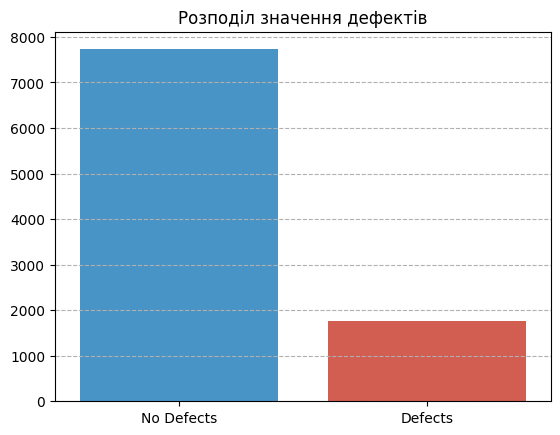

In [77]:
sns.barplot(x = ["No Defects", "Defects"], y = software_defects_data["Defects"].value_counts(), palette = ["#3498db", "#e74c3c"])
plt.title("Розподіл значення дефектів")
plt.grid(axis = 'y', linestyle = "--")
plt.ylabel('')
plt.show()

### Кореляція між факторами

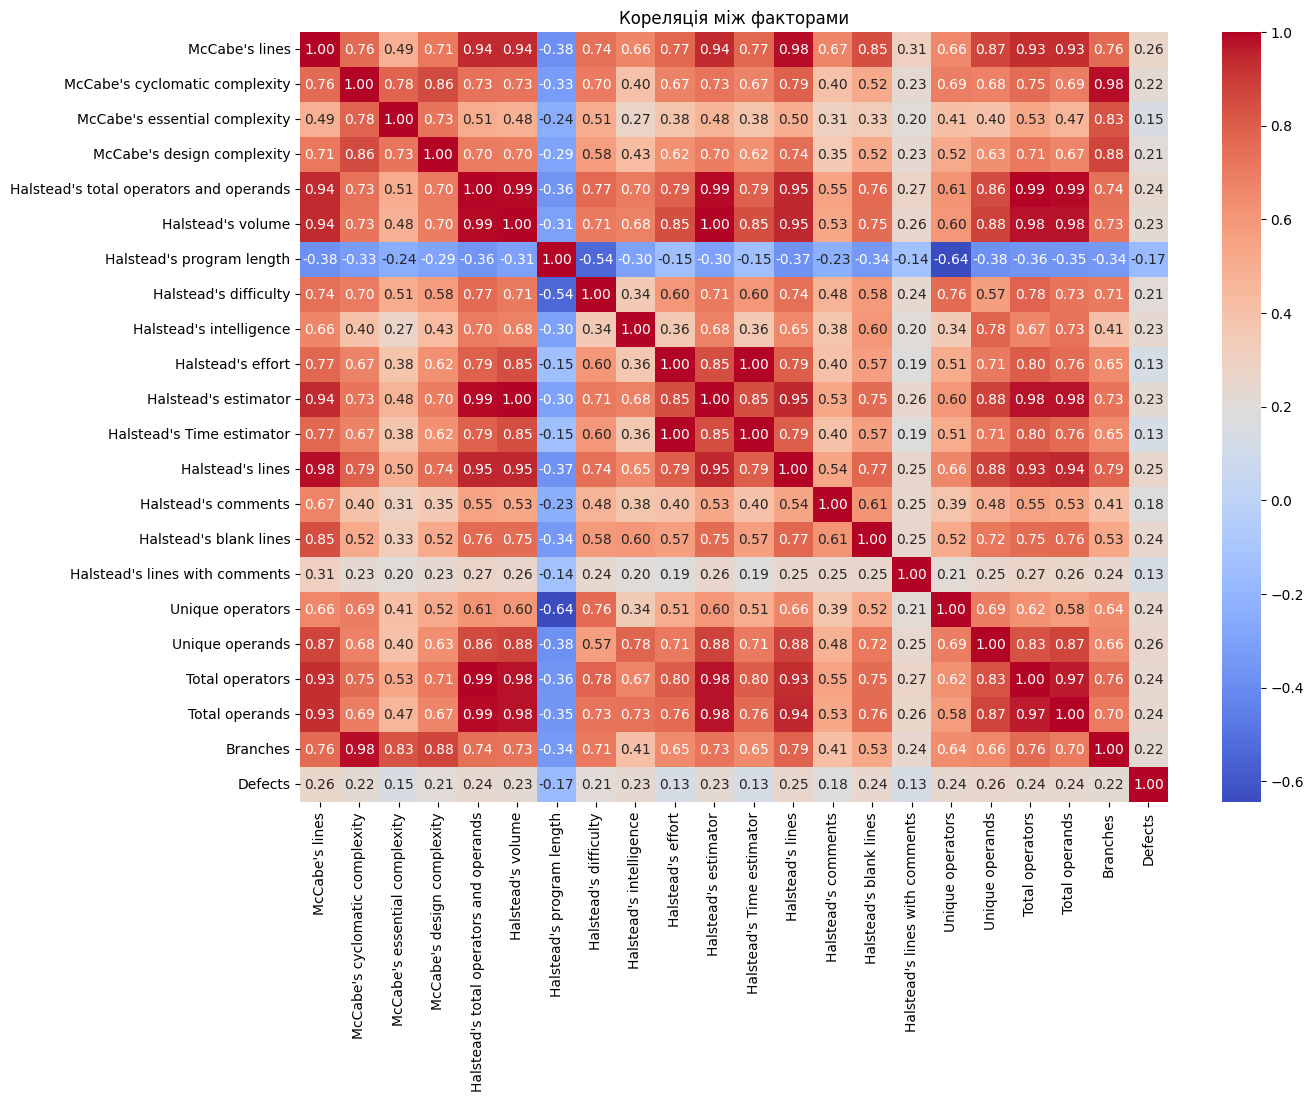

In [78]:
plt.figure(figsize = (14, 10))
sns.heatmap(software_defects_data.corr(), annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("Кореляція між факторами")
plt.show()

### Очистка даних на основі значень корелції

In [79]:
column_index = software_defects_data.columns.get_loc("Branches")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("McCabe's lines")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Halstead's lines")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Total operands")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Total operators")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Unique operands")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Unique operators")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Halstead's comments")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Halstead's blank lines")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Halstead's lines with comments")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Halstead's total operators and operands")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Halstead's Time estimator")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

column_index = software_defects_data.columns.get_loc("Halstead's volume")
software_defects_data.drop(software_defects_data.columns[column_index], axis = 1, inplace = True)

### Оновлена кореляція між факторами

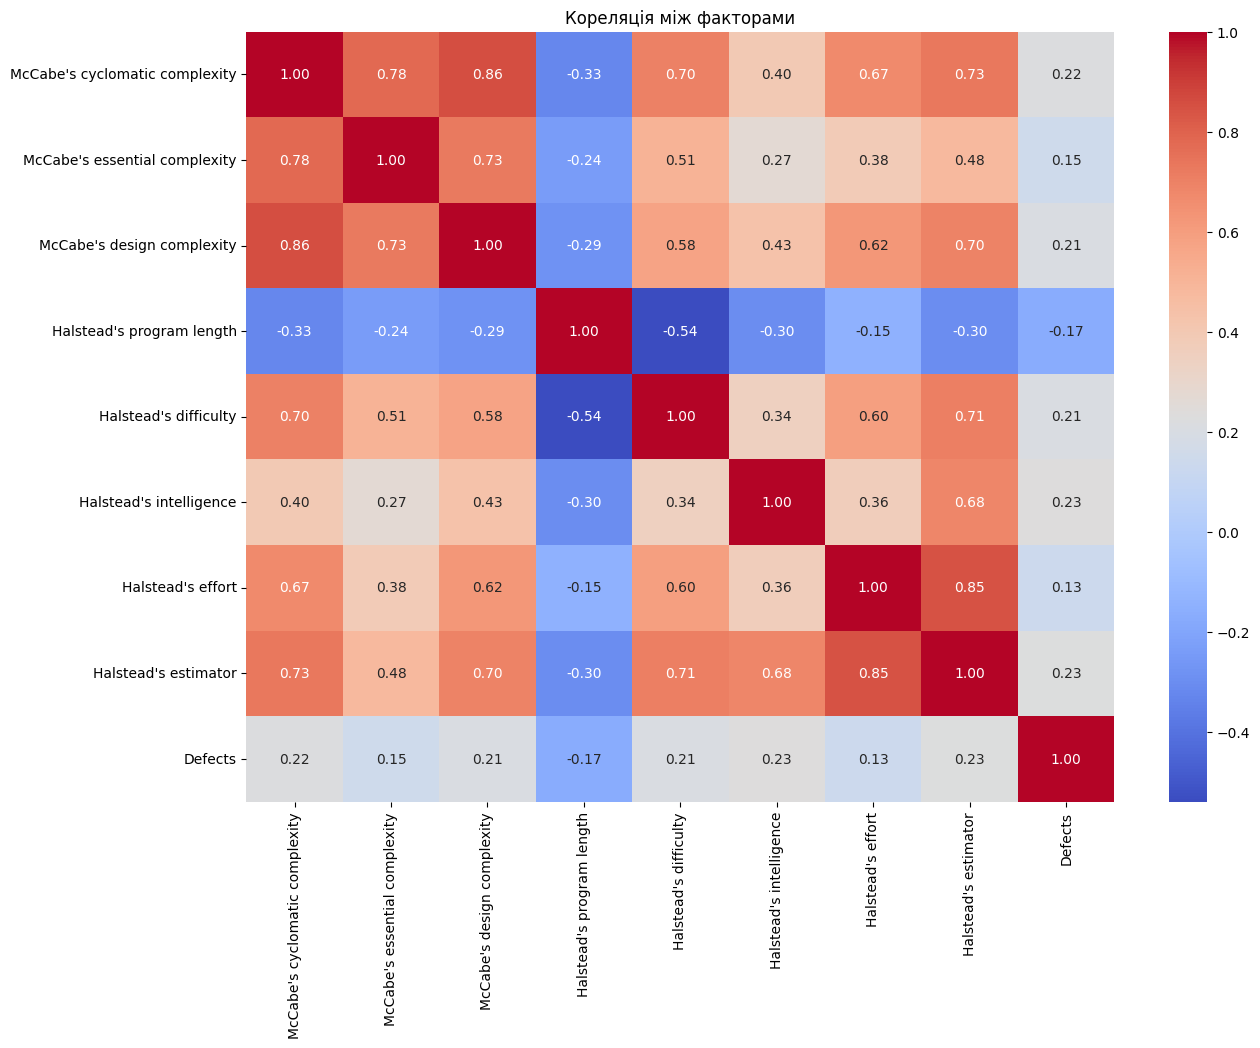

In [80]:
plt.figure(figsize = (14, 10))
sns.heatmap(software_defects_data.corr(), annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("Кореляція між факторами")
plt.show()

### Побудова аналітичного рішення

#### Підготовка даних

In [81]:
x = software_defects_data.drop(columns = ["Halstead's program length", "Defects"], axis = 1)
y = software_defects_data["Defects"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 0)
results = list()

#### Decision Tree Classifier

Best parameters:  {'max_depth': 4, 'max_features': 5}
Train score: 0.81777
Test score: 0.8178


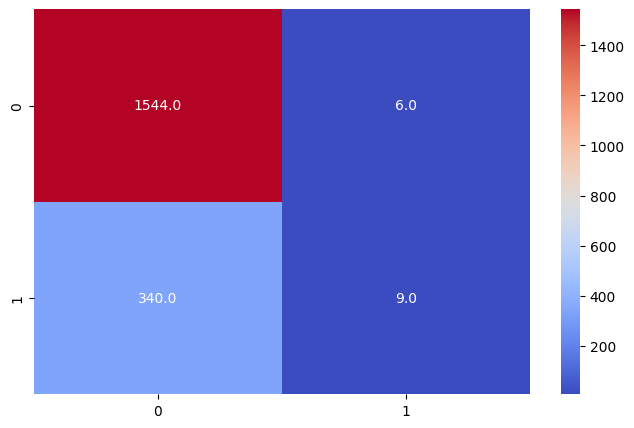

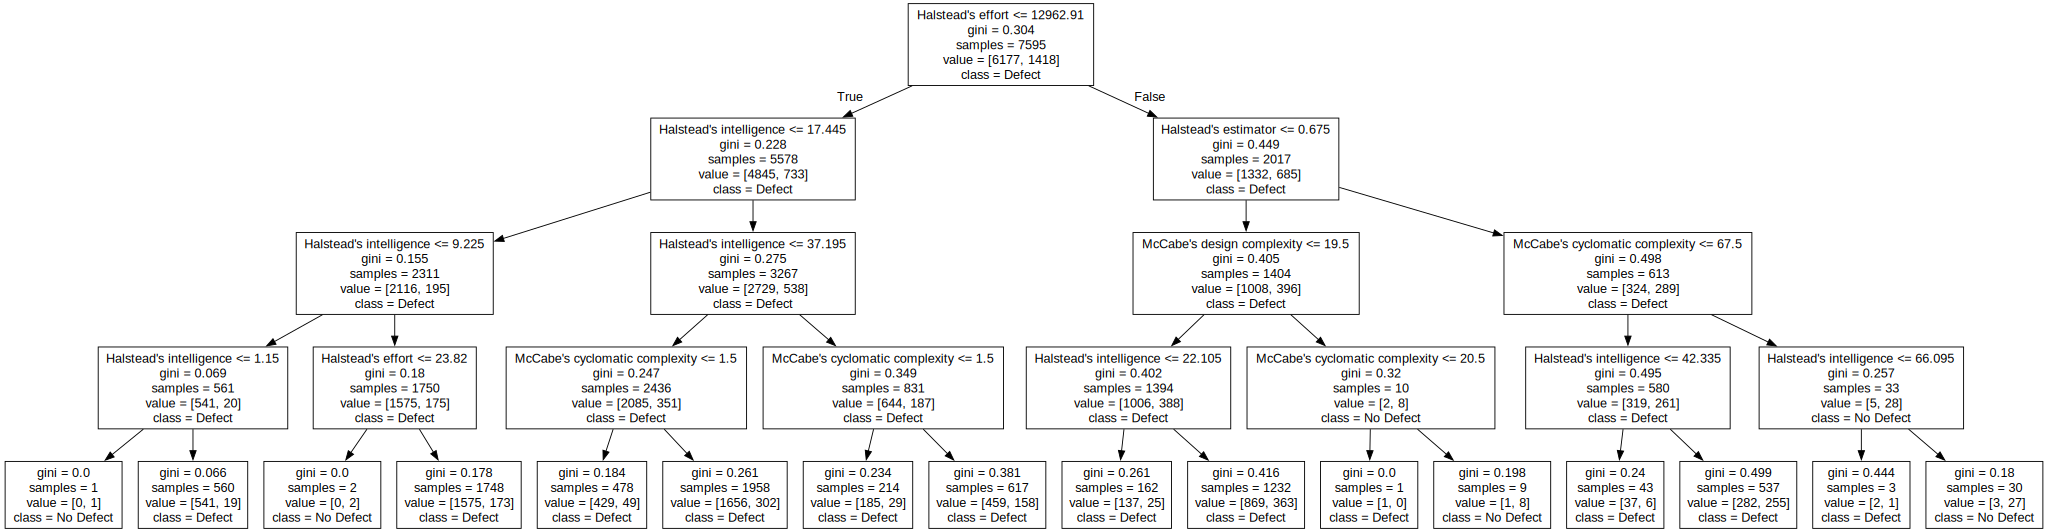

In [83]:
parameters = {
    "max_depth": list(range(1, 10)),
    "max_features": list(range(1, 10)),
    #"max_leaf_nodes": list(range(1, 10))
}

grid_search_results = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs = -1).fit(x_train, y_train)
print(f"Best parameters: ", grid_search_results.best_params_)

decision_tree_classifier = grid_search_results.best_estimator_.fit(x_train, y_train)

train_score = round(decision_tree_classifier.score(x_train, y_train), 5)
test_score = round(decision_tree_classifier.score(x_test, y_test), 5)
results.append({"Model": "Decision Tree\nClassifier", "Accuracy": train_score, "Type": "Train"})
results.append({"Model": "Decision Tree\nClassifier", "Accuracy": test_score, "Type": "Test"})
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

build_confusion_matrix(decision_tree_classifier, x_test, y_test)
build_tree_visualization(decision_tree_classifier, x.columns.to_list(), ["Defect", "No Defect"])

#### Random Forest Classifier

Best parameters: 4
Train score: 0.83423
Test score: 0.82043


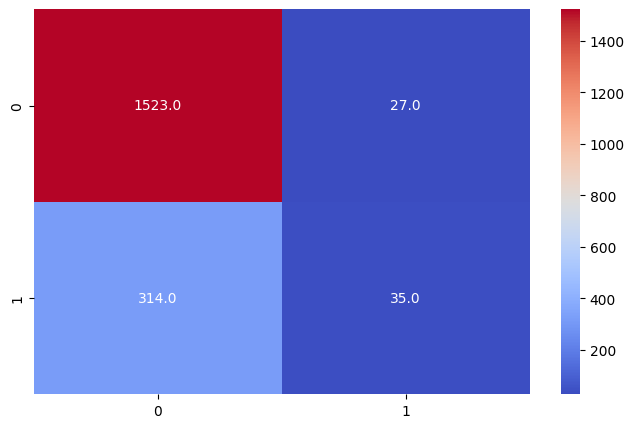

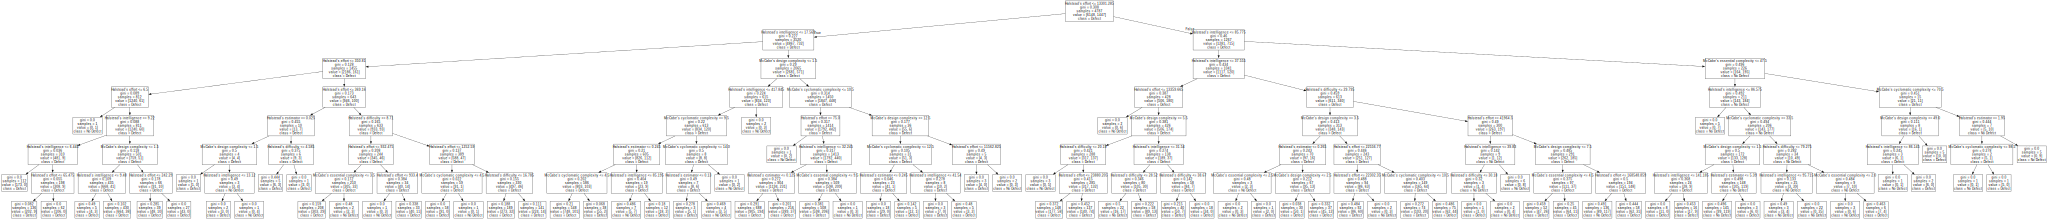

In [84]:
parameters = {
    "max_depth": list(range(1, 10)),
    "n_estimators": list(range(1, 10)),
    #"max_leaf_nodes": list(range(2, 3)),
}

grid_serch_results = GridSearchCV(RandomForestClassifier(n_jobs = -1), parameters).fit(x_train, y_train)
print("Best parameters:", grid_search_results.best_params_["max_depth"])

random_forest_classifier = grid_serch_results.best_estimator_.fit(x_train, y_train)

train_score = round(random_forest_classifier.score(x_train, y_train), 5)
test_score = round(random_forest_classifier.score(x_test, y_test), 5)
results.append({"Model": "Random Forest\nClassifier", "Accuracy": train_score, "Type": "Train"})
results.append({"Model": "Random Forest\nClassifier", "Accuracy": test_score, "Type": "Test"})
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

build_confusion_matrix(random_forest_classifier, x_test, y_test)
build_tree_visualization(random_forest_classifier.estimators_[0], x.columns.to_list(), ["Defect", "No Defect"])

#### Аналіз результатів

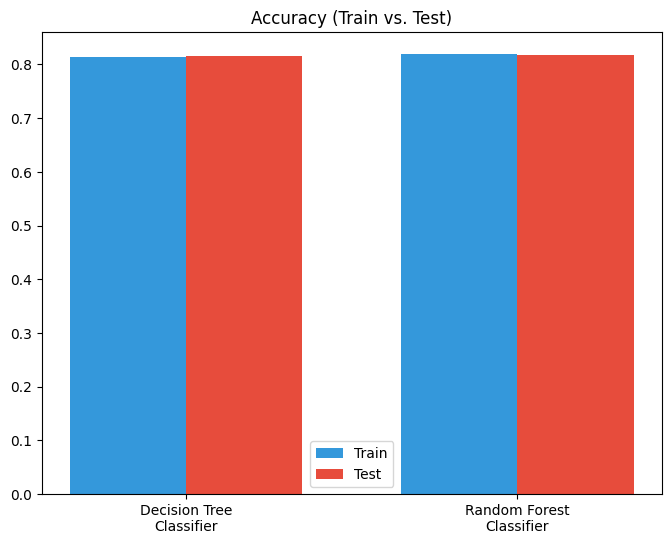

In [70]:
train_data = [result["Accuracy"] for result in results if result["Type"] == "Train"]
test_data = [result["Accuracy"] for result in results if result["Type"] == "Test"]
model_names = [result["Model"] for result in results if result["Type"] == "Train"]

BAR_WIDTH = 0.35
indices = np.arange(len(model_names))

plt.figure(figsize = (8, 6))
plt.bar(indices, train_data, BAR_WIDTH, label = "Train", color = "#3498db")
plt.bar(indices + BAR_WIDTH, test_data, BAR_WIDTH, label = "Test", color = "#e74c3c")
plt.title("Accuracy (Train vs. Test)")
plt.xticks(indices + BAR_WIDTH / 2, model_names)
plt.legend()
plt.show()